<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_TERRa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [ ]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/RTE.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
  inflating: data/ories and files    
  inflating: data/ip                 
  inflating: data/a/__MACOSX         



     0K .......... .......... .......... .......... ..........  6%  144K 5s
    50K .......... .......... .......... .......... .......... 13% 5.55M 2s
   100K .......... .......... .......... .......... .......... 20%  511K 2s
   150K .......... .......... .......... .......... .......... 27% 20.9M 1s
   200K .......... .......... .......... .......... .......... 34%  314K 1s
   250K .......... .......... .......... .......... .......... 40% 88.9M 1s
   300K .......... .......... .......... .......... .......... 47% 31.9M 1s
   350K .......... .......... .......... .......... .......... 54% 41.8M 1s
   400K .......... .......... .......... .......... .......... 61% 31.8M 0s
   450K .......... .......... .......... .......... .......... 68% 7.88M 0s
   500K .......... .......... .......... .......... .......... 75%  360K 0s
   550K .......... .......... .......... .......... .......... 81% 60.0M 0s
   600K .......... .......... .......... .......... .......... 88% 49.2M 0s
   650K ...

# Загрузка русскоязычного датасета

In [ ]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/TERRa" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/ple_data/
   creating: data/__MACOSX/
   creating: data/__MACOSX/TERRa/
  inflating: data/__MACOSX/TERRa/._train.jsonl  
  inflating: data/__MACOSX/TERRa/._.DS_Store  
  inflating: data/__MACOSX/TERRa/._test.jsonl  
  inflating: data/__MACOSX/TERRa/._val.jsonl  
  inflating: data/__MACOSX/._TERRa   



     0K .......... .......... .......... .......... ..........  5% 1.16M 1s
    50K .......... .......... .......... .......... .......... 11% 1.20M 1s
   100K .......... .......... .......... .......... .......... 16% 1.19M 1s
   150K .......... .......... .......... .......... .......... 22% 61.4M 0s
   200K .......... .......... .......... .......... .......... 28% 95.5M 0s
   250K .......... .......... .......... .......... .......... 33% 98.4M 0s
   300K .......... .......... .......... .......... .......... 39% 1.25M 0s
   350K .......... .......... .......... .......... .......... 45% 1.19M 0s
   400K .......... .......... .......... .......... .......... 50% 98.7M 0s
   450K .......... .......... .......... .......... .......... 56% 91.8M 0s
   500K .......... .......... .......... .......... .......... 62% 1.23M 0s
   550K .......... .......... .......... .......... .......... 67% 1.19M 0s
   600K .......... .......... .......... .......... .......... 73% 91.4M 0s
   650K ...

Fancy way to display content of the dataset directory

In [ ]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
# display the content of the folder
!tree

.
├── data
│   ├── a
│   │   └── __MACOSX
│   ├── ip
│   ├── __MACOSX
│   │   └── TERRa
│   ├── ories and files
│   ├── ple_data
│   ├── RTE
│   │   ├── test.jsonl
│   │   ├── train.jsonl
│   │   └── val.jsonl
│   └── TERRa
│       ├── test.jsonl
│       ├── train.jsonl
│       └── val.jsonl
└── temp.zip

7 directories, 10 files


# Загрузка в pandas

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [ ]:
handler = JSONL_handler('data/TERRa/train.jsonl')
df = handler.to_pandas()

In [ ]:
handler_val = JSONL_handler('data/TERRa/val.jsonl')
df1 = handler_val.to_pandas()

In [ ]:
handler_en = JSONL_handler('data/RTE/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

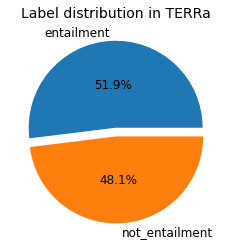

In [ ]:
import matplotlib.pyplot as plt
plt.title('Label distribution in TERRa', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

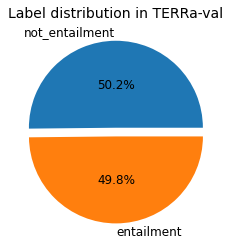

In [ ]:
import matplotlib.pyplot as plt
plt.title('Label distribution in TERRa-val', fontsize=14)
plt.pie(df1['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df1['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [ ]:
df['label'].value_counts()

entailment        1359
not_entailment    1257
Name: label, dtype: int64

In [ ]:
df_en['label'].value_counts()

entailment        1249
not_entailment    1241
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


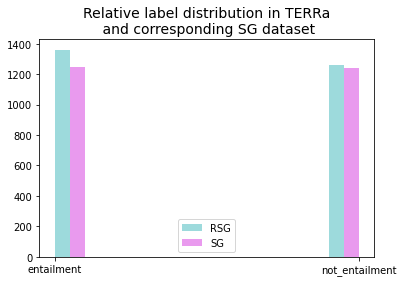

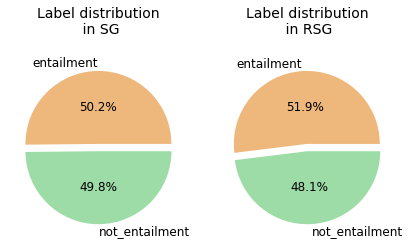

In [ ]:
plt.title('Relative label distribution in TERRa\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

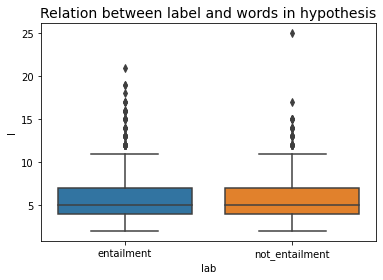

In [ ]:
import seaborn as sns
new_d = pd.DataFrame({'hypothesis': df.hypothesis, 'lab': df.label})
cnt = []
for i in range(len(new_d)):
  cnt.append(len(new_d['hypothesis'][i].split()))
new_d['l'] = cnt
_ = sns.boxplot(x='lab', y= 'l', data=new_d)
_ = plt.title('Relation between label and words in hypothesis', fontsize=14)
plt.show()

In [ ]:
print("entailment hypothesis mean words:", new_d[(new_d['lab']=='entailment')].mean())
print("not entailment hypothesis mean words:", new_d[(new_d['lab']!='entailment')].mean())

entailment hypothesis mean words: l    6.086093
dtype: float64
not entailment hypothesis mean words: l    5.888624
dtype: float64


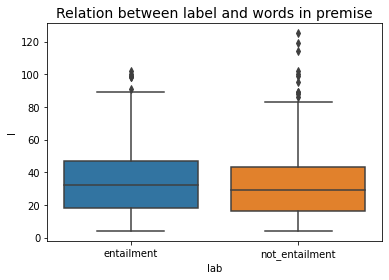

In [ ]:
new_p = pd.DataFrame({'premise': df.premise, 'lab': df.label})
cnt = []
for i in range(len(new_p)):
  cnt.append(len(new_p['premise'][i].split()))
new_p['l'] = cnt

_ = sns.boxplot(x='lab', y= 'l', data=new_p)
_ = plt.title('Relation between label and words in premise', fontsize=14)
plt.show()

In [71]:
print("entailment premise median words:", new_p[(new_p['lab']=='entailment')].median())
print("not entailment premise median words:", new_p[(new_p['lab']!='entailment')].median())

entailment premise median words: l    32.0
dtype: float64
not entailment premise median words: l    29.0
dtype: float64


In [ ]:
df.head()

,premise,hypothesis,label,idx
0,"Женщину доставили в больницу, за ее жизнь сейчас борются врачи.",Женщину спасают врачи.,entailment,0
1,"Он проводит невидимую грань между настоящим и будущим. В эти минуты все мы подводим главные итоги года, вспоминаем самые важные события. В эти мгновения мы с волнением ждем добрых перемен.",В эти минуты все мы подводим друг друга.,not_entailment,1
2,"Мужчина рассказал: детская коляска, принадлежащая его семье, пропала прямо из подъезда. Как выяснили полицейские, коляску украл сосед мужчины. Он был пьян, и ему нужны были деньги.",Сосед часто крадет детские коляски ради денег.,not_entailment,2
3,"Я просто об этом даже не думаю, потому что если кто-то что-то захочет, никуда не спрячешься.",Спрятаться не удастся.,entailment,3
4,"В ходе проверки нашли дома с наледью и сосульками на крышах. Информацию о них передали коммунальщикам. Во избежание несчастных случаев спасатели рекомендуют гражданам быть осторожней, а коммунальщикам – оперативней, при выходе из зданий советуют смотреть на крыши и, по возможности, обходить края зданий.",Все сосульки с крыш были сбиты.,not_entailment,4


# Entailment (ошибки и странности разметки)

In [ ]:
df_true = df[(df['label'] == "entailment")]
df_true.reset_index
df_true.iloc[30:40]

,premise,hypothesis,label,idx
60,"«Министерство сегодня вызвало российского посла, чтобы повторить свой протест. Встречи между парламентариями – важная составляющая политических контактов», - приводятся слова главы МИД Бёрге Бренде. Он добавил, что отказ в визах вызывает сожаление, так как визит мог бы способствовать укреплению двусторонних отношений.",Визит мог бы способствовать укреплению двусторонних отношений.,entailment,60
61,"В суде установили, что у ООО «Бежицкие маршрутные такси» есть лицензия и два договора с администрацией на перевозку пассажиров по маршруту «улица Молокова – Бордовичский водозабор», - говорится на сайте арбитражного суда Брянской области.",ООО «Бежицкие маршрутные такси» действует в Брянской области.,entailment,61
63,"""""""Будем участвовать в выборах (главы Химок - ИФ). Мы уже часть документов собрали, через несколько дней подадим на регистрацию и будем собирать подписи"""", - заявил он """"Интерфаксу"""" в понедельник. По его словам, у него есть несколько идей для предвыборной кампании: """"Например, все посты в правительстве будут занимать немцы, потому что наши чиновники все воруют"""".""",Предстоят выборы главы Химок.,entailment,63
64,"""По его мнению, """"оргкомитет просто не сможет удержать людей, чтобы не выступить в центре Москвы"""". По словам Удальцова, предложение провести митинг на Манежной площади не нашло понимания у представителей городской администрации. """"Другие варианты мы не стали предлагать, поскольку это привело бы к эскалации конфликта"""", - сказал он.""","По словам Удальцова, городская администрация против митинга на Манежной площади.",entailment,64
65,"""По словам контр-адмирала, судно, имевшее на борту оружие, зашло в территориальные воды Нигерии, не предупредив власти страны и тем самым нарушив местное законодательство. Между тем в Moran Security """"Интерфаксу"""" заявили, что считают задержание корабля необоснованным. """"Мы считаем этот арест необоснованным, потому что о заходе судна в порт было известно заранее"""".""",Судно задержали.,entailment,65
66,"Лиса забежала на водонапорную станцию «Малиновая гряда», где имела контакт с двумя служебными собаками «Нижегородского водоканала». Лабораторное исследование выявило у лисы бешенство. Из-за этого пришлось усыпить собак, с которыми она имела контакт.",На водонапорной станции лиса заразила собак бешенством.,entailment,66
68,"Конец месяца – время покупать проездные билеты на следующий. С 26 декабря в продажу поступили абонементы на горэлектротранспорт. Правда, пассажирам придется раскошелиться, поскольку с первого января тарифы заметно возрастут.",Абонементы на горэлектротранспорт уже в продаже.,entailment,68
69,"Свои поступки женщина объяснила тем, что муж бросил бы ее, если бы она родила ему много детей. К 2006 г. в семье уже росли два ребенка. Личность осужденной сохранена в тайне, поскольку разглашение этой информации противоречит немецкой системе правосудия.",Муж не любил много детей.,entailment,69
74,"По словам президента, налог один из самых низких в мире. Средства с этого налога поступают в казну и распределяются на социальные нужды. Что касается сборов – я знаю, что происходит, но не знаю этого в деталях.","Средства, собранные с помощью этого налога, идут на социальные нужды.",entailment,74
75,"Ежедневно в плотины поступает всё больше и больше воды, что не может не радовать.","Вчера в плотины поступало не так много воды, как сегодня.",entailment,75


In [ ]:
#ошибки
df.iloc[[]]

In [ ]:
#странности
df.iloc[[48, 54, 61]]

,premise,hypothesis,label,idx
48,"Там горожане могут купить хвойные деревья и лапник, пишет пресс-служба администрации.","В пресс-службе администрации планируют, что горожане будут покупать там хвойные деревья и лапник.",entailment,48
54,"""Но в принципе, считаю, нам неизбежно придется когда-то отказываться и от некоторых из проинвестированных проектов. Потому что особенно по высокотехнологичным проектам рано или поздно может возникать очень коварная менеджерская альтернатива. Все понимают, что проект """"не пошел"""", но поскольку в него уже вложены средства, очень страшно назвать кошку - кошкой.""","""От """"мертвого"""" проекта трудно отказаться, когда в него уже вложены деньги.""",entailment,54
61,"В суде установили, что у ООО «Бежицкие маршрутные такси» есть лицензия и два договора с администрацией на перевозку пассажиров по маршруту «улица Молокова – Бордовичский водозабор», - говорится на сайте арбитражного суда Брянской области.",ООО «Бежицкие маршрутные такси» действует в Брянской области.,entailment,61


# Not entailment

In [ ]:
df_false = df[(df['label'] == "not_entailment")]
df_false.reset_index
df_false.iloc[:10]

,premise,hypothesis,label,idx
1,"Он проводит невидимую грань между настоящим и будущим. В эти минуты все мы подводим главные итоги года, вспоминаем самые важные события. В эти мгновения мы с волнением ждем добрых перемен.",В эти минуты все мы подводим друг друга.,not_entailment,1
2,"Мужчина рассказал: детская коляска, принадлежащая его семье, пропала прямо из подъезда. Как выяснили полицейские, коляску украл сосед мужчины. Он был пьян, и ему нужны были деньги.",Сосед часто крадет детские коляски ради денег.,not_entailment,2
4,"В ходе проверки нашли дома с наледью и сосульками на крышах. Информацию о них передали коммунальщикам. Во избежание несчастных случаев спасатели рекомендуют гражданам быть осторожней, а коммунальщикам – оперативней, при выходе из зданий советуют смотреть на крыши и, по возможности, обходить края зданий.",Все сосульки с крыш были сбиты.,not_entailment,4
7,"Ходатайство о продлении заявила адвокат задержанной, отметив, что следствием не были предоставлены документы, характеризующие личность задержанной.",Адвокат задержанной отметила отличную работу следствия.,not_entailment,7
10,"Музей, расположенный в Королевских воротах, меняет экспозицию. На смену выставке, рассказывающей об истории ворот и их реставрации, придет «Аптека трех королей». Как рассказали в музее, посетители попадут в традиционный интерьер аптеки.",Музей закроется навсегда.,not_entailment,10
11,"27 декабря в полицию обратилась жительница Димитровграда, которая сообщила, что стала жертвой мошенников. Она рассказала полицейским, что ей позвонил якобы сотрудник банка. Он сообщил, что, поскольку женщина является их постоянным клиентом, ей положена компенсация.",Сотрудник банка пообещал женщине компенсацию.,not_entailment,11
13,"Врачи поставили ей диагноз: «алкогольное опьянение». Данным фактом заинтересовалась областная прокуратура. - В настоящее время проводится проверка, выясняются подробности происшествия, а также при каких обстоятельствах был приобретен алкогольный напиток.","Прокуратура выясняет, кто именно купил алкоголь.",not_entailment,13
16,"""""""Законопроект, безусловно, полезный и крайне своевременный, поскольку блокировать следует не только порнографические сайты, но и ресурсы экстремистской направленности"""".""","Блокировать следует и сайты, и ресурсы.",not_entailment,16
19,"Судно прибывает в сочинский порт за 7 часов. В то же время, билет на самолет до Сочи в летнее время стоит 3 тысячи, а время в пути – чуть меньше часа.",Судном до Сочи добираться быстрее.,not_entailment,19
24,"Представитель внешнеполитического ведомства отметил, что злоумышленника задержали местные власти.",Злоумышленник напуган.,not_entailment,24


# Step-by-step reproduction with the help of the OG code

In [ ]:
%%bash
wget -q --show-progress "https://russiansuperglue.com/tasks/tf_idf" -O temp.zip
unzip temp.zip -d data
rm temp.zip

In [ ]:
import codecs
import json
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

vect = joblib.load("data/tfidf.pkl")

def build_feature_TERRa(row):
    premise = str(row["premise"]).strip()
    hypothesis = row["hypothesis"]
    label = row.get("label")
    res = f"{premise} {hypothesis}"
    return res, label


def build_features_TERRa(path, vect):
    with codecs.open(path, encoding='utf-8-sig') as reader:
        lines = reader.read().split("\n")
        lines = list(map(json.loads, filter(None, lines)))
    res = list(map(build_feature_TERRa, lines))
    texts = list(map(lambda x: x[0], res))
    labels = list(map(lambda x: x[1], res))
    ids = [x["idx"] for x in lines]
    return (vect.transform(texts), labels), ids


def fit_TERRa(train, labels):
    clf = LogisticRegression()
    return clf.fit(train, labels)


def eval_TERRa(train_path, val_path, test_path, vect):
    train, _ = build_features_TERRa(train_path, vect)
    val, _ = build_features_TERRa(val_path, vect)
    test, ids = build_features_TERRa(test_path, vect)
    clf = fit_TERRa(*train)
    try:
        test_score = clf.score(*test)
    except ValueError:
        test_score = None
    test_pred = clf.predict(test[0])
    return clf, {
        "train": clf.score(*train),
        "val": clf.score(*val),
        "test": test_score,
        "test_pred": [{"idx": idx, "label": str(label)} for idx, label in zip(ids, test_pred)]
    }

In [ ]:
train_path = "data/TERRa/train.jsonl"
val_path = "data/TERRa/val.jsonl"
test_path = "data/TERRa/test.jsonl"

_, TERRa_scores = eval_TERRa(train_path, val_path, test_path, vect)

In [ ]:
TERRa_scores["train"], TERRa_scores["val"]

(0.7152140672782875, 0.46579804560260585)

In [ ]:
train, _ = build_features_TERRa(train_path, vect)
val, _ = build_features_TERRa(val_path, vect)

In [ ]:
clf = fit_TERRa(*train)
y_din = clf.predict(val[0])
print("Accuracy: {}".format(clf.score(*val)))
print(classification_report(val[1], y_din))

Accuracy: 0.46579804560260585
                precision    recall  f1-score   support

    entailment       0.47      0.50      0.48       153
not_entailment       0.46      0.43      0.45       154

      accuracy                           0.47       307
     macro avg       0.47      0.47      0.47       307
  weighted avg       0.47      0.47      0.47       307

